In [44]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# importing the dataset
cust_acq= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 2 - Credit Card Case Study (1)\Customer Acqusition.csv")
repay= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 2 - Credit Card Case Study (1)\Repayment.csv")
spend= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 2 - Credit Card Case Study (1)\spend.csv")
cust_acq
repay
spend


,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [46]:
#cleaning of tables
repay.dtypes
repay.duplicated()
repay.drop_duplicates(inplace= True)

In [47]:
#dropping null columns
repay.dropna(axis=0, how ='all', inplace=True)
repay.dropna(axis=1, how ='all', inplace=True)

In [48]:
cust_acq.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [49]:
#setting correct format of dates
spend['Month']= pd.to_datetime(spend['Month'], format='%d-%b-%y')
repay['Month']= pd.to_datetime(repay['Month'], format='%d-%b-%y')
spend.rename(columns= {'Sl No:':'SL No:'}, inplace=True)   

In [50]:
#now the data is cleaned it's time to combine the tables
df= pd.merge(left= spend, right= repay, how= 'right' , on= ['Customer','SL No:'] )
df=pd.merge(left= df, right= cust_acq,how= 'inner', on= 'Customer')
df

,SL No:,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,NaT,NaN,NaN,2004-01-12,495414.75,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,CLOTHES,23740.46,2004-01-15,259490.06,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,FOOD,484342.47,2004-01-25,437555.12,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,CAMERA,369694.07,2005-01-17,165972.88,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,2006-05-03,AIR TICKET,305050.62,2005-11-22,55108.71,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,2005-02-23,CAMERA,314704.54,2005-12-03,429700.12,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,2004-01-12,AUTO,498358.28,2005-02-23,344628.72,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,2004-01-25,TRAIN TICKET,461282.47,2006-03-31,336264.37,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [51]:
df.dtypes
df.head(17)# In[ ]:


,SL No:,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,NaT,NaN,NaN,2004-01-12,495414.75,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,CLOTHES,23740.46,2004-01-15,259490.06,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,FOOD,484342.47,2004-01-25,437555.12,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,CAMERA,369694.07,2005-01-17,165972.88,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
5,6.0,A1,2005-02-23,SANDALS,168285.60,2005-02-23,365366.62,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
6,7.0,A1,2005-02-01,CAR,23370.20,2005-02-01,14473.41,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
7,103.0,A1,2004-01-12,TRAIN TICKET,440563.22,2004-01-12,350446.82,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
8,117.0,A1,2004-02-05,BUS TICKET,52208.65,2004-02-05,117964.43,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
9,131.0,A1,2006-04-19,AIR TICKET,346925.68,2006-04-19,79849.19,1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [52]:
#filling null areas
df.iloc[0, 0]= 1.0
df.iloc[0, 2]= df.iloc[0, 5]
df.iloc[0, 3] ='JEWELLERY'
df.iloc[0, 4] =495414.75

In [53]:
#checking for null values
df.isna().sum()

SL No:      0
Customer    0
Month_x     0
Type        0
Amount_x    0
Month_y     0
Amount_y    0
No          0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [54]:
#dropping unnecessary columns
df.drop(columns=[ 'No','SL No:'], inplace=True)

# Q1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.

In [55]:
p=np.where(df.Age<18, df.Age.mean(), df.Age)
p= pd.DataFrame(p)
df.Age=p

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [56]:
#renaming columns
df.rename(columns={'Amount_x':'spent_amt', 'Amount_y': 'repayment_amt', 'Month_x':'spent_month', 'Month_y':'repayment_month'}, 
          inplace=True)

In [57]:
r=np.where(df.spent_amt>df.Limit, [((df.Limit)*50)//100],df.spent_amt )
r= pd.DataFrame(r).T
df.spent_amt= r

## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [58]:
s= np.where(df.repayment_amt>df.Limit,df.Limit,df.repayment_amt )
s= pd.DataFrame(s)
df.repayment_amt=s


# Q2. From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [59]:
b= df.Customer.nunique()
print("Distinct customers are", b)

Distinct customers are 100


## b. How many distinct categories exist?

In [60]:
di=df.Segment.nunique()
print("Distinct categories existing are", di)

Distinct categories existing are 5


## c. What is the average monthly spend by customers?

In [61]:
df.groupby(by = df.spent_month.dt.month_name()).spent_amt.mean().reset_index()# In[ ]:


,spent_month,spent_amt
0,April,135035.860667
1,August,165759.524762
2,December,117272.591071
3,February,151261.493697
4,January,147798.600029
5,July,166326.698810
6,June,182037.695714
7,March,131840.686104
8,May,151623.903619
9,November,150428.357262


## d. What is the average monthly repayment by customers?

In [62]:
df.groupby(by = df.repayment_month.dt.month_name()).repayment_amt.mean().reset_index()

,repayment_month,repayment_amt
0,April,167676.814933
1,August,152817.425510
2,December,190138.995000
3,February,158873.098158
4,January,163445.534263
5,July,165203.918980
6,June,114146.549375
7,March,156430.854155
8,May,186097.903985
9,November,152692.206667


## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [63]:
damt= df.groupby(by = df.repayment_month.dt.month).repayment_amt.sum().reset_index()
damt.rename(columns={'repayment_month':'month'}, inplace=True)
samt=df.groupby(by = df.spent_month.dt.month).spent_amt.sum().reset_index()
samt.rename(columns={'spent_month':'month'}, inplace=True)
monthly_data=pd.merge(left=damt,right= samt, how= 'inner', on= 'month')
monthly_data['profit']=damt.repayment_amt- samt.spent_amt
monthly_data.profit=np.where(monthly_data.profit<0, np.nan, monthly_data.profit)
monthly_data['interest%']= monthly_data.profit*2.9//100
monthly_data

,month,repayment_amt,spent_amt,profit,interest%
0,1,52139125.43,51581711.41,557414.02,16165.0
1,2,36223066.38,36000235.50,222830.88,6462.0
2,3,34258357.06,30455198.49,3803158.57,110291.0
3,4,25151522.24,20255379.10,4896143.14,141988.0
4,5,49502042.46,31841019.76,17661022.70,512169.0
5,6,5479034.37,10194110.96,NaN,NaN
6,7,8094992.03,6985721.35,1109270.68,32168.0
7,8,7488053.85,6961900.04,526153.81,15258.0
8,9,5173830.74,5927529.09,NaN,NaN
9,10,4082854.29,3668498.42,414355.87,12016.0


## f. What are the top 5 product types?`

In [64]:
df.groupby(by= 'Type').spent_amt.sum().reset_index().sort_values('spent_amt',ascending= False).head(5)

,Type,spent_amt
10,PETRO,28597368.48
4,CAMERA,27690728.44
7,FOOD,20519229.60
0,AIR TICKET,20155835.12
14,TRAIN TICKET,19995818.22


## g. Which city is having maximum spend?

In [65]:
df.groupby(by = 'City').spent_amt.sum().reset_index().sort_values('spent_amt', ascending= False).head(1)

,City,spent_amt
4,COCHIN,45963489.0


## h. Which age group is spending more money?

In [66]:
df.groupby(by = 'Age').spent_amt.sum().reset_index().sort_values('spent_amt', ascending= False).head(1)

,Age,spent_amt
6,28.0,17365270.23


## i. Who are the top 10 customers in terms of repayment?

In [67]:
df.groupby(by = 'Customer').repayment_amt.sum().reset_index().sort_values('repayment_amt', ascending= False).head(10)

,Customer,repayment_amt
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [68]:
city_yearly_spend=df.groupby(by= [df.spent_month.dt.year,'City', 'Product']).spent_amt.sum().reset_index()
city_yearly_spend
city_yearly_spend_1 = pd.pivot_table(data = city_yearly_spend, index = 'City', columns=['Product','spent_month'], 
               values='spent_amt')
city_yearly_spend_1

Product            Gold                              Platimum              \
spent_month        2004         2005         2006        2004        2005   
City                                                                        
BANGALORE    9299822.49  12892362.99  12030611.09  1112727.80   912281.97   
BOMBAY       6987853.53   8983018.28   7917144.31   897260.44   711800.94   
CALCUTTA     7477140.98  10303355.80  11167532.77  2037686.80  4434693.81   
CHENNAI      1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN       7315850.15  12110613.03  10499142.38  3419902.07  4960920.71   
DELHI        2806495.00   1964845.27   2957103.32   283510.89   494154.36   
PATNA        2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM   2415102.84   1240375.85   2735710.87  2161673.67  3601436.30   

Product                      Silver                         
spent_month        2006        2004       2005        2006  
City                                                        
BANGALORE     685829.77  1291845.58  830606.84  1415476.94  
BOMBAY        972125.51   532089.03  508988.04  1092833.80  
CALCUTTA     3589602.16   500006.00  440147.06  1157955.92  
CHENNAI      5024923.40   282055.36  377183.49   350006.00  
COCHIN       4920589.29   814223.12  652264.38  1269983.87  
DELHI         176787.72   768172.30  612311.21   854899.97  
PATNA        1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM   2147398.25   209665.48  269910.49   555858.62

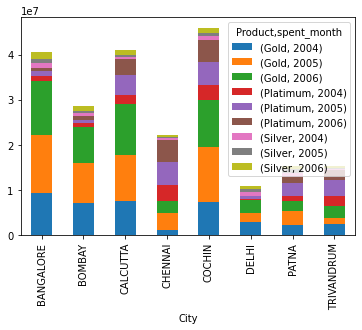

In [69]:
city_yearly_spend_1.plot(kind='bar',stacked=True)
plt.show()

# Q4. Create graphs for
## a. Monthly comparison of total spends, city wise

In [70]:
monthly_spends= df.groupby(by= ['City',df.spent_month.dt.month]).spent_amt.sum().reset_index()
monthly_spends1= pd.pivot_table(data=monthly_spends, values='spent_amt',index='City',columns=['spent_month'], aggfunc='sum')
monthly_spends1

spent_month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9051732.79,6734491.26,5362900.07,4207978.48,6383111.13,1330685.40,2228216.19,695060.95,703018.28,1091601.61,2260602.57,422166.74
BOMBAY,5948990.33,4276985.80,5227848.50,1873784.51,3891942.60,1172594.97,177726.32,1066744.75,1278402.29,676005.20,2872048.40,140040.21
CALCUTTA,9064862.40,8150544.11,4939037.04,3457507.45,5578246.87,2293045.31,2234573.27,1548353.52,1511713.07,196357.83,2078879.43,55001.00
CHENNAI,4466960.36,4385815.45,3183642.21,2518656.49,2856198.12,1244242.16,693825.27,305875.97,745758.90,156247.17,1347779.28,223628.27
COCHIN,11714367.54,5747882.38,5645142.53,3882742.94,6581081.69,2495745.07,1290895.80,2317306.61,1382242.40,868551.89,3127997.60,909532.55
DELHI,2714259.95,1494063.06,2267148.52,777240.25,1600321.57,511275.59,50001.00,155401.66,50001.00,64615.46,391610.46,842341.52
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704332.49,2857119.89,2392313.01,1199289.45,2813530.98,400336.33,260483.50,453772.94,186063.20,285581.92,143386.40,640922.26


<function matplotlib.pyplot.show(close=None, block=None)>

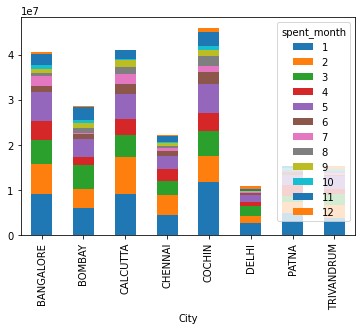

In [71]:
monthly_spends1.plot(kind= 'bar', stacked= True)
plt.show

## b. Comparison of yearly spend on air tickets

In [148]:
air_tkt=df[df.Type=='AIR TICKET'].groupby(by= df.spent_month.dt.year).spent_amt.sum().reset_index()
air_tkt= pd.pivot_table( data= air_tkt, columns= 'spent_month', values = 'spent_amt')
air_tkt

spent_month,2004,2005,2006
spent_amt,4357220.35,10550148.21,5248466.56


<AxesSubplot:xlabel='AIR TICKET'>

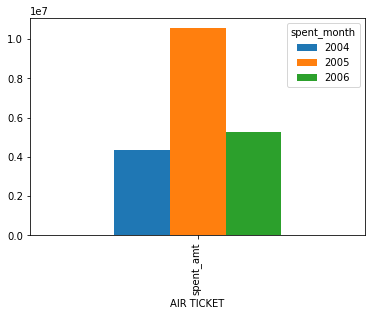

In [149]:
air_tkt.plot(kind= 'bar',xlabel='AIR TICKET', )

## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [74]:
comparison=df.groupby(by=['Product',df.spent_month.dt.month_name()]).spent_amt.sum().reset_index()
comparison= pd.pivot_table(data= comparison, columns=['spent_month'], index='Product', values= 'spent_amt')
comparison

spent_month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32423775.78,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182489.86,1714760.80,750154.19,9134044.58,14951564.51,1288154.26,2965711.21,7288828.18,8151918.49,2741613.42,550274.04,1667839.34
Silver,1902316.65,293108.82,200537.40,2087011.37,4206371.12,530150.72,689537.11,3909397.83,2140931.51,691101.13,100001.00,442802.13


<AxesSubplot:xlabel='Product'>

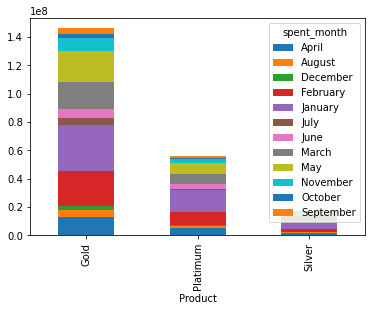

In [75]:
comparison.plot(kind= 'bar', stacked= True)

# Q5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.def top_customers(product, time_period):


In [122]:
sf= pd.DataFrame()
sf= df


In [127]:
sf['monthly']= sf.repayment_month.apply(lambda x:x.month)
sf['yearly']= sf.repayment_month.apply(lambda x:x.year)

In [142]:
def func(prod, timeperiod):
    return sf.loc[sf.Product==prod].groupby(by= ['Customer', 'City', 'Product', timeperiod]).repayment_amt.sum().reset_index().sort_values('repayment_amt',ascending=False).head(10)


In [143]:
prod= str(input("Enter Gold/Silver/Platimum "))
timeperiod= str(input("Enter either monthly or yearly: "))

Enter Gold/Silver/Platimum Platimum
Enter either monthly or yearly: monthly


In [144]:
top10 = func(prod, timeperiod)

In [145]:
top10

,Customer,City,Product,monthly,repayment_amt
114,A41,COCHIN,Platimum,1,2089998.54
118,A41,COCHIN,Platimum,5,1999863.05
106,A40,CALCUTTA,Platimum,1,1749083.51
94,A39,TRIVANDRUM,Platimum,5,1668976.58
80,A38,CHENNAI,Platimum,1,1655584.31
90,A39,TRIVANDRUM,Platimum,1,1565119.57
208,A56,CHENNAI,Platimum,3,1500854.63
109,A40,CALCUTTA,Platimum,5,1401293.97
81,A38,CHENNAI,Platimum,2,1365681.76
91,A39,TRIVANDRUM,Platimum,2,1212860.65
